In [2]:
%matplotlib inline
# autoload the package, for debuge purpose
%load_ext autoreload
%autoreload 2

# import modules and plot setting
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import datetime
from astropy.table import Table
from astropy.io import fits
from mangatools import maps, utils

today = datetime.date.today().isoformat()

# set the display properties
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# customize the warning message
import warnings
warnings.filterwarnings("default") # default or ignore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read Data
R-L relation

### Fraquelli2003

In [3]:
from astropy.table import Table
# read data from (Fraquelli 2003) 
fraquelli2003 = Table.read('data/Fraquelli2003.txt', format='ascii')
fraquelli2003[:2]

name,L_OIII,delta,distance,scale
str14,float64,float64,float64,int64
ESO417-G6,38.3,-3.5,63.89,310
Fairall316,35.91,-2.9,63.63,308


escape: NGC1386
escape: NGC5643


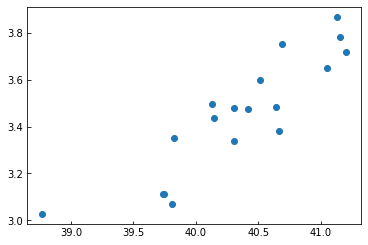

In [4]:
# convert fraquelli2001 to surface brightness
SB = 1e-16
r = np.linspace(100, 40000, 1000)
dr = np.diff(r)
r = r[0:-1]
fra03_r = []
fra03_L = []

for i in range(0, len(fraquelli2003)):
    # exclude two also observerd by Bennert2006a
    if fraquelli2003['name'][i] == 'NGC5643' or fraquelli2003['name'][i] == 'NGC1386':
        print("escape:", fraquelli2003['name'][i])
    L_tmp = fraquelli2003['L_OIII'][i] + fraquelli2003['delta'][i] * (np.log10(r) - np.log10(100))
    #print(logF)
    threshold = np.log10(SB*4*np.pi*fraquelli2003['distance'][i]**2 
                     *(u.Mpc.to(u.cm))**2/(fraquelli2003['scale'][i]**2))
    #print(threshold)
    sel = L_tmp < threshold
    fra03_L.append(np.log10(np.sum(10**L_tmp[sel] * 2*np.pi*r[sel]*dr[sel])))
    r_tmp = np.min(r[sel])
    fra03_r.append(np.log10(r_tmp))
fra03_L = np.array(fra03_L)
fra03_r = np.array(fra03_r)
if True: #plot
    plt.plot(fra03_L, fra03_r, 'o')
    #print(fra2003_r, fra2003_L)

### Bennert2006a

In [5]:
bennert2006a = Table.read('data/Bennert2006a.txt', format='ascii')
bennert2006a[:2]

name,dist,scale,R_NLR,L0_OIII,delta,delta_err
str11,int64,int64,int64,float64,float64,float64
IC5063,47,220,2860,38.41,-2.73,0.33
NGC7212,110,504,5040,38.46,-2.13,0.57


Escape bad fit: ESO362-G008


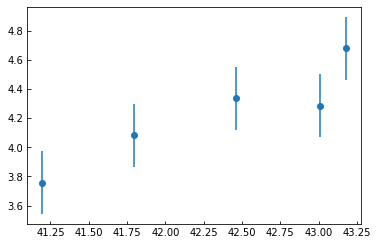

In [6]:
# convert fraquelli2001 to surface brightness
r = np.linspace(100, 400000, 1000)
dr = np.diff(r)
r = r[0:-1]
ben06a_L = []
ben06a_r = []
ben06a_r_err = []
for i in range(0, len(bennert2006a)):
    if bennert2006a['delta'][i] > -1e-6:
        print('Escape bad fit:', bennert2006a['name'][i])
        continue
    L_tmp = bennert2006a['L0_OIII'][i] + bennert2006a['delta'][i] * (np.log10(r) - np.log10(100))
    #print(logF)
    threshold = np.log10(1e-16*4*np.pi*bennert2006a['dist'][i]**2 
                     *(u.Mpc.to(u.cm))**2/(bennert2006a['scale'][i]**2))
    #print(threshold)
    sel = L_tmp < threshold
    ben06a_L.append(np.log10(np.sum(10**L_tmp[sel] * 2*np.pi*r[sel]*dr[sel])))
    r_tmp = np.min(r[sel])
    ben06a_r.append(np.log10(r_tmp))
    ben06a_r_err.append(0.5/np.log(10)) #need update
ben06a_L = np.array(ben06a_L)
ben06a_r = np.array(ben06a_r)
ben06a_r_err = np.array(ben06a_r_err)
if True:
    #print(r_bennert_a, F_bennert_a)
    plt.errorbar(ben06a_L, ben06a_r, yerr=ben06a_r_err, marker='o', linestyle='None')

### Bennert2006b

In [7]:
bennert2006b = Table.read('data/Bennert2006b.txt', format='ascii')
bennert2006b[:2]

name,dist,scale,R_NLR,L0_OIII,delta,delta_err
str13,int64,int64,int64,float64,float64,float64
Fairall51,60,283,2260,38.14,-3.55,0.25
NGC6860,62,293,1465,37.69,-3.06,0.12


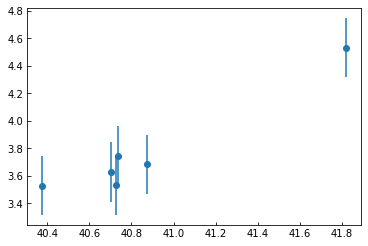

In [8]:
# convert fraquelli2001 to surface brightness
r = np.linspace(100, 40000, 1000)
dr = np.diff(r)
r = r[0:-1]
ben06b_L = []
ben06b_r = []
ben06b_r_err = []
for i in range(0, len(bennert2006b)):
    if bennert2006b['delta'][i] > -1e-6:
        print('Escape bad fit:', bennert2006b['name'][i])
        continue
    L_tmp = bennert2006b['L0_OIII'][i] + bennert2006b['delta'][i] * (np.log10(r) - np.log10(100))
    #print(logF)
    threshold = np.log10(1e-16*4*np.pi*bennert2006b['dist'][i]**2 
                     *(u.Mpc.to(u.cm))**2/(bennert2006b['scale'][i]**2))
    #print(threshold)
    sel = L_tmp < threshold
    ben06b_L.append(np.log10(np.sum(10**L_tmp[sel] * 2*np.pi*r[sel]*dr[sel])))
    r_tmp = np.min(r[sel])
    ben06b_r.append(np.log10(r_tmp))
    ben06b_r_err.append(0.5/np.log(10)) #need update

ben06b_L = np.array(ben06b_L)
ben06b_r = np.array(ben06b_r)
ben06b_r_err = np.array(ben06b_r_err)

if True:
    #print(r_bennert_a, F_bennert_a)
    plt.errorbar(ben06b_L, ben06b_r, yerr=ben06b_r_err, marker='o', linestyle='None')

### Greene2011

In [9]:
greene2011 = Table.read('data/Greene2011.txt', format='ascii')
greene2011[:2]

SDSS,LOIII,ROIII,RCont,FWHM,beta1,beta2,uplimit
str10,float64,float64,float64,float64,float64,float64,int64
J0157−0053,42.91,4.3,4.0,3.0,2.9,3.2,1
J1106+0357,42.52,4.0,4.1,2.8,2.9,3.2,0


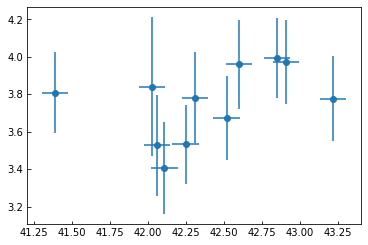

In [10]:
gre11_L = greene2011['LOIII'].data
gre11_L_err = np.full_like(gre11_L, 0.2/np.log(10)) # 20% error for dust extinction
gre11_r_up = -1/greene2011['beta1'].data + greene2011['ROIII'].data
gre11_r_low = -1/greene2011['beta2'].data + greene2011['ROIII'].data
gre11_r = 0.5 * (gre11_r_up + gre11_r_low)
gre11_r_err = np.abs(gre11_r - gre11_r_low) + np.log10(3)/np.log(10) # (3r)/r/np.log(10)
#gre11_L = gre11_L.tolist()
#gre11_r = gre11_r.tolist()
#re11_r_err = gre11_r_err.tolist()
if True:
    plt.errorbar(gre11_L, gre11_r, xerr=gre11_L_err, yerr=gre11_r_err, linestyle='None', marker='o')

### Liu2013

In [11]:
liu2013 = Table.read('data/Liu2013.txt', format='ascii')
liu2013[:2]

name,z,seeing,L_OIII,L_err,R_obs,R_int
str19,float64,float64,float64,float64,float64,float64
J014932.53-004803.7,0.566,0.52,42.87,0.13,7.4,6.9
J021047.01-100152.9,0.54,0.58,43.48,0.1,17.8,14.4


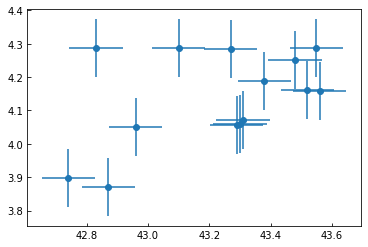

In [12]:
liu13_L = liu2013['L_OIII'].data
liu13_L_err = np.full_like(liu13_L, 0.2/np.log(10)) # 20% uncertainty for type2 AGNs
liu13_r = np.log10(liu2013['R_obs'].data * 1000)
liu13_r_err = np.full_like(liu13_r, 0.2/np.log(10))

#liu13_L = liu13_L.tolist()
#liu13_r = liu13_r.tolist()
#liu13_r_err = liu13_r_err.tolist()

if True:
    plt.errorbar(liu13_L, liu13_r, xerr=liu13_L_err, yerr=liu13_r_err, marker='o', ls='None')

### Liu2014

In [13]:
liu2014 = Table.read('data/Liu2014.txt', format='ascii')
liu2014[:2]

name,z,seeing,L_OIII,R_obs,R_int,vLv8um
str19,float64,float64,float64,float64,float64,float64
J023342.57-074325.8,0.4538,0.42,43.13,12.4,10.7,45.05
J030422.39+002231.8,0.6385,0.47,42.82,8.2,7.9,45.91


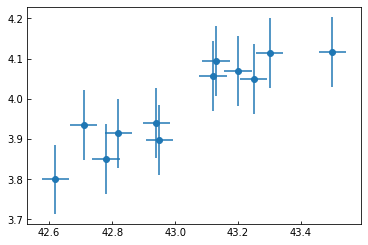

In [14]:
liu14_L = liu2014['L_OIII'].data
liu14_L_err = np.full_like(liu14_L, 0.1/np.log(10)) # 10% uncertainty for type1 AGNs
liu14_r = np.log10(liu2014['R_obs'].data * 1000)
liu14_r_err = np.full_like(liu14_r, 0.2/np.log(10))

#liu14_L = liu14_L.tolist()
#liu14_r = liu14_r.tolist()
#liu14_r_err = liu14_r_err.tolist()

if True:
    plt.errorbar(liu14_L, liu14_r, xerr=liu14_L_err, yerr=liu14_r_err, marker='o', ls='None')

### This work

In [15]:
this_Ldata = Table.read('data/LO3-2019-03-20.dat', format="ascii")
this_Rdata = Table.read('data/R_fsb-2019-03-20.dat', format='ascii')

In [16]:
mcmc_fitting = Table.read('data/mcmc.txt', format='ascii')
is_converge = (mcmc_fitting['is_converge'] >= 1) & (mcmc_fitting['is_converge'] <= 2)
np.sum(is_converge) 

69

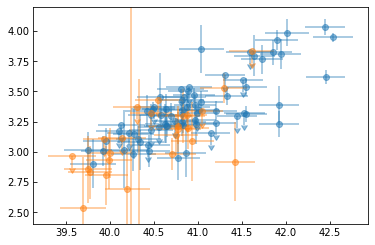

In [17]:
this_L = this_Ldata['LO3_redcorr'].data
this_L_err = 0.5 * (this_Ldata['LO3_redcorr_err_up'].data + this_Ldata['LO3_redcorr_err_low'].data)

this_r = this_Rdata['logR_fsb2_orig'].data
this_r_err = this_Rdata['logR_fsb2_orig_err'].data

is_limit = this_Rdata['is_limit'].data == 1
not_limit = this_Rdata['is_limit'].data == 0
contaminate = (this_Rdata['agn_fraction'].data < 0.1) #& is_limit
unresolve = this_Rdata['agn_pixels'].data < 100
excess = this_Rdata['excess'] == 1

this_r[is_limit] = this_Rdata['logR_fsb2'].data[is_limit]


if True:
    #plt.plot(this_L[not_limit], this_r[not_limit], 'o')
    #plt.plot(this_L[is_limit], this_r[is_limit], 'o')
    
    #plt.plot(this_L, this_r, 'o')
    #plt.plot(this_L[contaminate], this_r[contaminate], 'o')
    #plt.plot(this_L[excess], this_r[excess], 'o')
    
    #plt.errorbar(this_L, this_r, xerr=this_L_err, yerr=this_r_err, uplims=is_limit, marker='o', ls='None', alpha=0.5)
    
    # account for the is_converge
    this_L1 = this_L[is_converge]
    this_L_err1 = this_L_err[is_converge]
    this_r1 = this_r[is_converge]
    this_r_err1 = yerr=this_r_err[is_converge]
    is_limit1 = is_limit[is_converge]
    plt.errorbar(this_L1, this_r1, xerr=this_L_err1, yerr=this_r_err1, uplims=is_limit1, marker='o', ls='None', alpha=0.5)
    
    this_L2 = this_L[~is_converge]
    this_L_err2 = this_L_err[~is_converge]
    this_r2 = this_r[~is_converge]
    this_r_err2 = yerr=this_r_err[~is_converge]
    is_limit2 = is_limit[~is_converge]
    plt.errorbar(this_L2, this_r2, xerr=this_L_err2, yerr=this_r_err2, uplims=is_limit2, marker='o', ls='None', alpha=0.5)
    
    plt.ylim(2.4, 4.2)
    
    #plt.errorbar(this_L[contaminate], this_r[contaminate], xerr=this_L_err[contaminate], yerr=this_r_err[contaminate], marker='o', ls='None', alpha=0.5, uplims=True)
    #plt.errorbar(this_L[unresolve], this_r[unresolve], xerr=this_L_err[unresolve], yerr=this_r_err[unresolve], marker='o', ls='None', alpha=0.5, lolims=True)

## Size(ENLR) - Luminosty(AGN) relation

/Users/hang/.local/miniconda3/envs/astro/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


alpha: -12.494±0.783, beta: +0.385±0.019, sig^2: 0.005


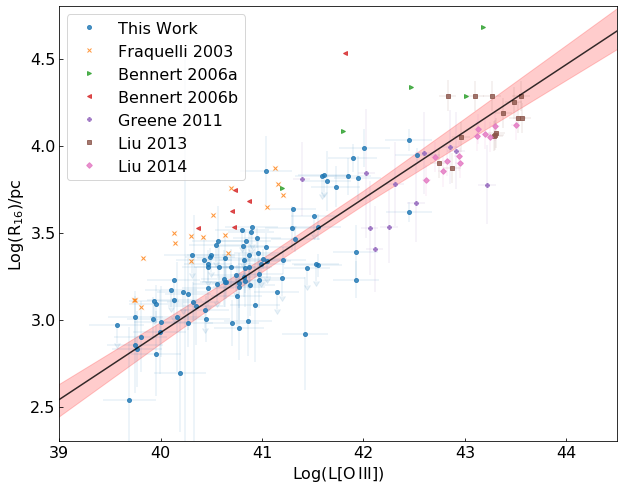

In [18]:
# Isophote
import numpy as np
import astropy.units as u
from astropy.table import Table
import matplotlib.pyplot as plt
from ltsfit.lts_linefit import lts_linefit
from mangatools import linmix

set_matplotlib_formats('png')

# preset for plot
fs = 16
lw = 2
ms = 4
pa = 0.8 # point alpha
ea = 0.1 #errorbar alpha

X_all = [] #include all the data points
X_all_err = []
Y_all = []
Y_all_err = []

X_ifu = [] #include just the ifu obervation
X_ifu_err = []
Y_ifu = []
Y_ifu_err = []
Y_delta = []

# default error, use for fitting
x_err_default = 0.2*np.log(10) # 20% error
y_err_default = 0.2*np.log(10) # 20% error

fig, ax = plt.subplots(1,1, figsize=(10, 8))
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.tick_params(axis='both', which='minor', labelsize=fs-1)

if True: # plot data of this work
    color = 'C0'
    marker = 'o'
    ax.plot(this_L, this_r, marker=marker, alpha=pa, label='This Work', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(this_L, this_r, xerr=this_L_err, uplims=is_limit,
                 yerr=this_r_err, ls='None', label=None, alpha=ea, color=color)
    #ax.plot(this_L1, this_r1, marker=marker, alpha=0.8, label='This Work', 
    #        color=color, lw=lw, ms=ms, linestyle='None')
    #plt.errorbar(this_L1, this_r1, xerr=this_L_err1, uplims=is_limit1,
    #             yerr=this_r_err1, ls='None', label=None, alpha=0.1, color=color)
    #ax.plot(this_L2, this_r2, marker=marker, alpha=0.3, 
    #        color=color, lw=lw, ms=ms, linestyle='None')
    #plt.errorbar(this_L2, this_r2, xerr=this_L_err2, uplims=is_limit2,
    #             yerr=this_r_err2, ls='None', label=None, alpha=0.1, color=color)
    # append data for fitting
    X_all.append(this_L)
    X_all_err.append(this_L_err)
    Y_all.append(this_r)
    Y_all_err.append(this_r_err)
    Y_delta.append(~is_limit)
    

if True: # plot fraqulli 2003
    color = 'C1'
    marker = 'x'
    ax.plot(fra03_L, fra03_r, marker=marker, alpha=pa, label='Fraquelli 2003', color=color, 
            lw=lw, ms=ms, linestyle='None')
    ax.errorbar(fra03_L, fra03_r, marker=marker, alpha=ea, label=None, color=color,
                linestyle='None')#, yerr=np.full_like(fra03_r), uplims=np.ones_like(fra03_r))
    # append data for fitting
    #X_all.append(fra03_L)
    #X_all_err.append(np.full_like(fra03_L, x_err_default)) # 50% error
    #Y_all.append(fra03_r)
    #Y_all_err.append(np.full_like(fra03_r, y_err_default))
    #Y_delta.append(np.full_like(fra03_r, False))


if True: # plot Bennert 2006a
    color = 'C2'
    marker = '>'
    ax.plot(ben06a_L, ben06a_r, marker=marker, alpha=pa, label='Bennert 2006a', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(ben06a_L, ben06a_r, ls='None', label=None, alpha=ea, color=color,)
                 #uplims=np.ones_like(ben06a_r) yerr=np.full_like(ben06a_r, 0.05))
    # append data for fitting
    #X_all.append(ben06a_L)
    #X_all_err.append(np.full_like(ben06a_L, x_err_default))
    #Y_all.append(ben06a_r)
    #Y_all_err.append(ben06a_r_err)
    #Y_delta.append(np.full_like(ben06a_r, False))

if True: # plot Bennert 2006b
    #ax.errorbar(ben06b_L, ben06b_r, yerr=ben06b_r_err, marker='o', linestyle='None', label='Bennert 2006b')
    color = 'C3'
    marker = '<'
    ax.plot(ben06b_L, ben06b_r, marker=marker, alpha=pa, label='Bennert 2006b', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(ben06b_L, ben06b_r, ls='None', label=None, alpha=ea, color=color,)
                 #yerr=np.full_like(ben06b_r, 0.05), uplims=np.ones_like(ben06b_r))
    # append data for fitting
    #X_all.append(ben06b_L)
    #X_all_err.append(np.full_like(ben06b_L, x_err_default))
    #Y_all.append(ben06b_r)
    #Y_all_err.append(ben06b_r_err)
    #Y_delta.append(np.full_like(ben06b_r, False))
    
if True: # plot greene 2011
    color = 'C4'
    marker = 'P'
    ax.plot(gre11_L, gre11_r, marker=marker, alpha=pa, label='Greene 2011', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(gre11_L, gre11_r, xerr=gre11_L_err, yerr=gre11_r_err, 
                 ls='None', label=None, alpha=ea, color=color)
    # append data for fitting
    X_all.append(gre11_L)
    X_all_err.append(np.full_like(gre11_L, x_err_default))
    Y_all.append(gre11_r)
    Y_all_err.append(gre11_r_err)
    Y_delta.append(np.ones_like(gre11_r))

    
if True: # plot liu2013
    #ax.errorbar(liu13_L, liu13_r, yerr=liu13_r_err, marker='o', ls='None', label='Liu 2013')
    color = 'C5'
    marker = 's'
    ax.plot(liu13_L, liu13_r, marker=marker, alpha=pa, label='Liu 2013', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(liu13_L, liu13_r, yerr=liu13_r_err, xerr=liu13_L_err,
                 ls='None', label=None, alpha=ea, color=color)
    # append data for fitting
    X_all.append(liu13_L)
    X_all_err.append(np.full_like(liu13_L, x_err_default))
    Y_all.append(liu13_r)
    Y_all_err.append(liu13_r_err)
    Y_delta.append(np.ones_like(liu13_r))
    
if True: # plot liu2014
    #ax.errorbar(liu14_L, liu14_r, yerr=liu14_r_err, marker='o', ls='None', label='Liu 2014')
    color = 'C6'
    marker = 'D'
    ax.plot(liu14_L, liu14_r, marker=marker, alpha=pa, label='Liu 2014', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(liu14_L, liu14_r, yerr=liu14_r_err, xerr=liu14_L_err,
                 ls='None', label=None, alpha=ea, color=color)
    # append data for fitting
    X_all.append(liu14_L)
    X_all_err.append(np.full_like(liu14_L, x_err_default))
    Y_all.append(liu14_r)
    Y_all_err.append(liu14_r_err)
    Y_delta.append(np.ones_like(liu14_r))


if False: # do fitting
    xfit = np.concatenate(X_all)
    xfit_err = np.concatenate(X_all_err)
    yfit = np.concatenate(Y_all)
    yfit_err = np.concatenate(Y_all_err)
    

    p = lts_linefit(xfit, yfit, xfit_err, yfit_err, clip=3, epsy=True, corr=True, frac=None, 
                    pivot=0, plot=False, text=False)

    # show fitting results
    rms = np.std(p.ab[0] + p.ab[1]*xfit[p.mask] - yfit[p.mask], ddof=2)
    par = np.append(p.ab, p.sig_int)
    sig_par = np.append(p.ab_err, p.sig_int_err)

    xmin, xmax = np.min(xfit), np.max(xfit)
    dx = xmax - xmin
    xlimits = np.array([xmin - dx, xmax + dx])
    y_res = par[0] + par[1]*xlimits
    ax.plot(xlimits, y_res, '-k')
    ax.plot(xlimits, y_res + rms, '--r', alpha=0.3)
    ax.plot(xlimits, y_res - rms, '--r', alpha=0.3)
    #ax.set_title(r"$y = (0.307 \pm 0.021) x - (9.09 \pm 0.86)$", fontsize=fs)
    #ax.text(41., 2.7, "Spearman r=0.78, p=1e-19 \n Pearson r=0.84, p=1e-25", 
    #        fontsize=fs)

if True: # fitting with linmix
    xfit = np.concatenate(X_all)
    xfit_err = np.concatenate(X_all_err)
    yfit = np.concatenate(Y_all)
    yfit_err = np.concatenate(Y_all_err)
    ydelta = np.concatenate(Y_delta)

    lm = linmix.LinMix(xfit, yfit, xfit_err, yfit_err, delta=ydelta, K=2)
    lm.run_mcmc(silent=True)
    
    #for i in range(0, len(lm.chain), 25):
    #    xs = np.arange(38,46)
    #    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    #    ax.plot(xs, ys, color='r', alpha=0.02)
    curves = []
    xs = np.arange(38,46)
    for i in range(0, len(lm.chain)):
        curves.append(lm.chain[i]['alpha'] + xs * lm.chain[i]['beta'] + lm.chain[i]['sigsqr'])

    # Plot 95% confidence interval
    lo, hi = np.percentile(curves, (2.5, 97.5), axis=0)
    #lo, hi = np.percentile(curves, (17, 83), axis=0)
    ax.fill_between(xs, lo, hi, color='red', alpha=0.2)
    #ax.fill_between(xs, lo, hi, color='mistyrose', alpha=0.2)
    alpha, alpha_err = np.mean(lm.chain['alpha']), np.std(lm.chain['alpha'])
    beta, beta_err = np.mean(lm.chain['beta']), np.std(lm.chain['beta'])
    sigsqr = np.mean(lm.chain['sigsqr'])
    print(r"alpha: {:+.3f}±{:.3f}, beta: {:+.3f}±{:.3f}, sig^2: {:.3f}".format(
            alpha, alpha_err, beta, beta_err, sigsqr))
    ax.plot(xs, alpha + xs * beta + sigsqr, 'k-', alpha=0.8)
    
    
ax.set_xlabel(r"${\rm Log(L[O\,III])}$", fontsize=fs)
ax.set_ylabel(r"Log(R$_{16}$)/pc", fontsize=fs)
ax.set_xlim(39, 44.5)
ax.set_ylim(2.3, 4.8)
ax.legend(fontsize=fs, loc='upper left')
fig.savefig('./results/all_fitting.pdf', bbox_inches='tight')
#set_matplotlib_formats('png')